# Mushroom classification

In [1]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv("dataset/mushrooms.csv")
df.shape
df.head(5)

(8124, 23)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [7]:
# cast all columns to categorical
df = df.apply(lambda col: col.astype("category"))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class                     8124 non-null   category
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-root                8124 non-null   category
 12  stalk-surface-above-ring  8124 non-null   category
 13  stalk-surface-below-ring  8124 non-null   catego

In [8]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 1:]
y = df.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
X_train.shape, X_test.shape

((6499, 22), (1625, 22))

In [9]:
# Exploratory analysis on the data
df_train = pd.concat((X_train, y_train), axis=1)
df_train.columns
df_train.head(1)

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'class'],
      dtype='object')

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
5249,f,y,y,f,f,f,c,b,g,e,...,p,b,p,w,o,l,h,y,g,p


<AxesSubplot:xlabel='cap-shape', ylabel='count'>

<AxesSubplot:xlabel='cap-surface', ylabel='count'>

<AxesSubplot:xlabel='cap-color', ylabel='count'>

<AxesSubplot:xlabel='bruises', ylabel='count'>

<AxesSubplot:xlabel='odor', ylabel='count'>

<AxesSubplot:xlabel='gill-attachment', ylabel='count'>

<AxesSubplot:xlabel='gill-spacing', ylabel='count'>

<AxesSubplot:xlabel='gill-size', ylabel='count'>

<AxesSubplot:xlabel='gill-color', ylabel='count'>

<AxesSubplot:xlabel='stalk-shape', ylabel='count'>

<AxesSubplot:xlabel='stalk-root', ylabel='count'>

<AxesSubplot:xlabel='stalk-surface-above-ring', ylabel='count'>

<AxesSubplot:xlabel='stalk-surface-below-ring', ylabel='count'>

<AxesSubplot:xlabel='stalk-color-above-ring', ylabel='count'>

<AxesSubplot:xlabel='stalk-color-below-ring', ylabel='count'>

<AxesSubplot:xlabel='veil-type', ylabel='count'>

<AxesSubplot:xlabel='veil-color', ylabel='count'>

<AxesSubplot:xlabel='ring-number', ylabel='count'>

<AxesSubplot:xlabel='ring-type', ylabel='count'>

<AxesSubplot:xlabel='spore-print-color', ylabel='count'>

<AxesSubplot:xlabel='population', ylabel='count'>

<AxesSubplot:xlabel='habitat', ylabel='count'>

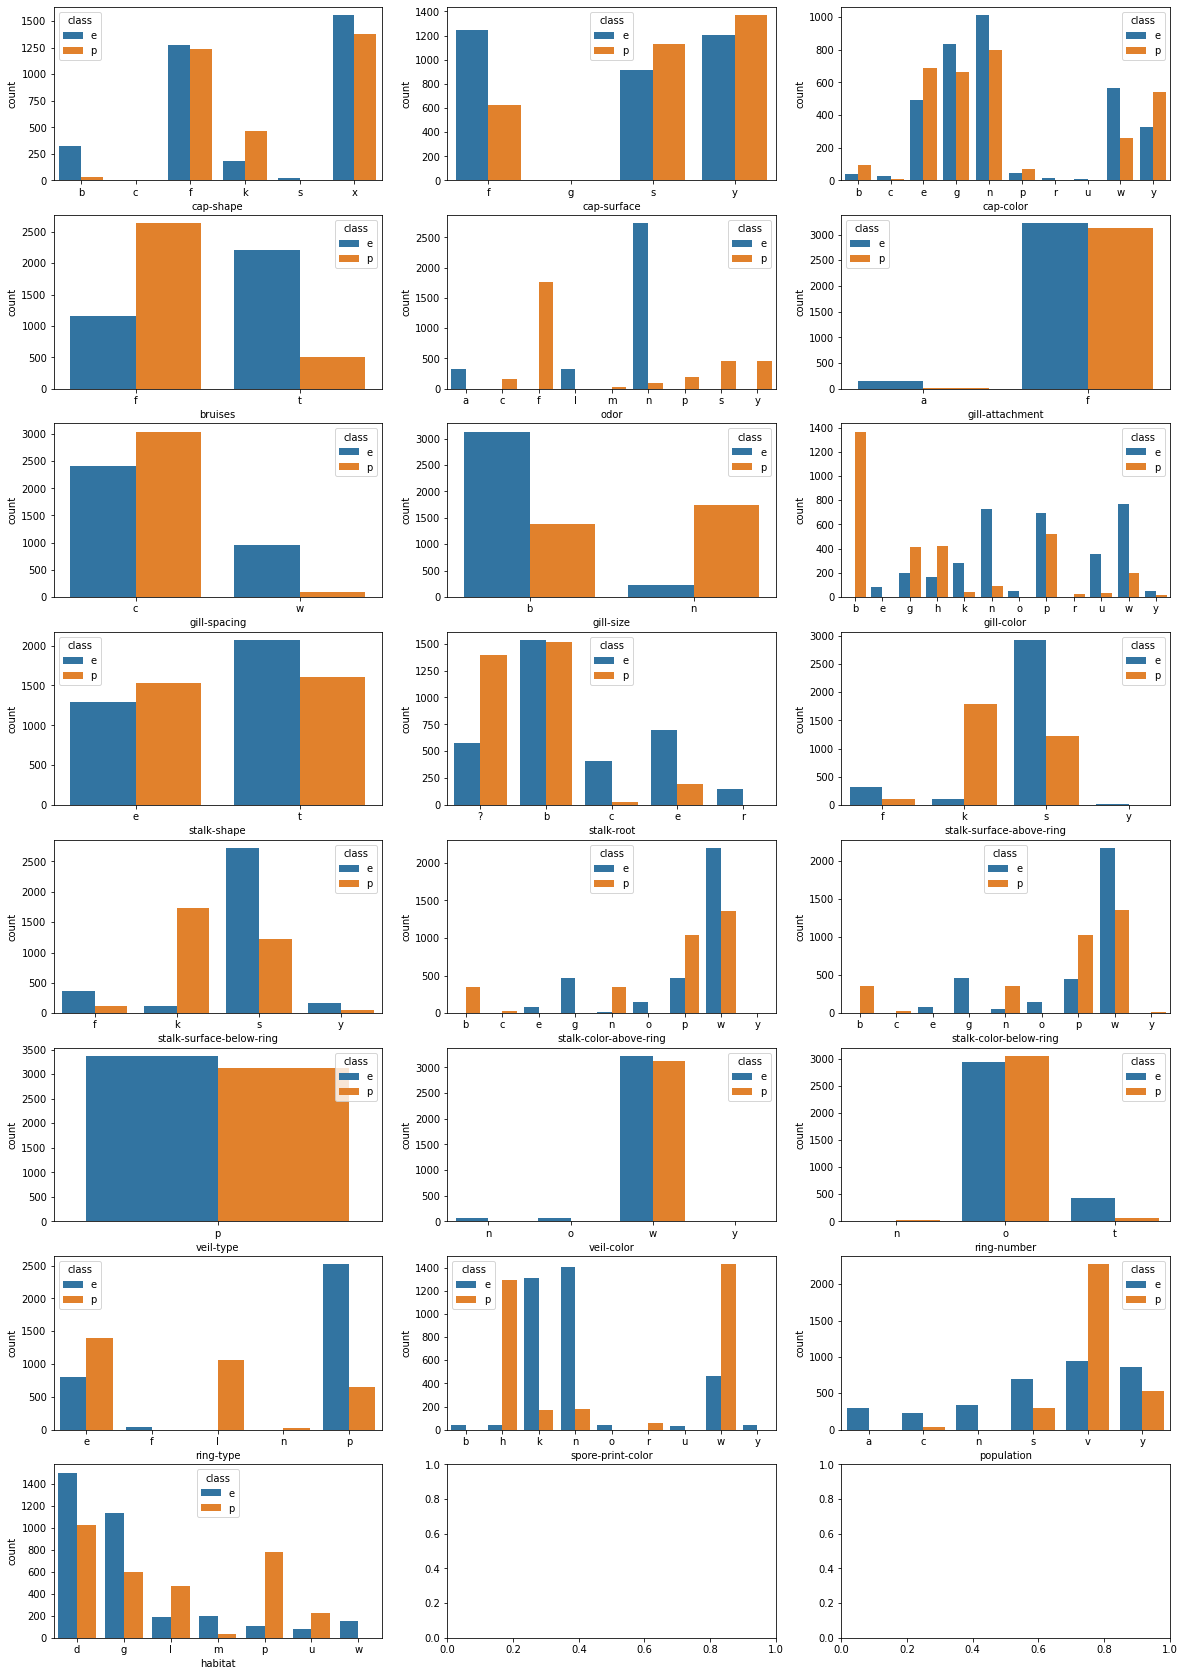

In [10]:
figure, axes = plt.subplots(nrows=8, ncols=3, figsize=(20, 30))
for col_no in range(len(df_train.columns) - 1):
    sns.countplot(
        x=df_train.columns[col_no], hue="class", data=df_train, ax=axes[col_no // 3][col_no % 3]
    )

In [11]:
# data distribution by class
df_train.groupby(by="class")["cap-shape"].count()

class
e    3366
p    3133
Name: cap-shape, dtype: int64

## Use only one hot encoding

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# From the column description, https://www.kaggle.com/uciml/mushroom-classification
# all features seem to be nominal features.
feature_cols = df_train.columns[:-1]
target_col = df_train.columns[-1]

data_preprocessing = ColumnTransformer(
    transformers=[
        ("one_hot_encoder", OneHotEncoder(), feature_cols),
    ],
    remainder="passthrough",
)

target_encoder = LabelEncoder()

X_train_trans = data_preprocessing.fit_transform(X_train)
y_train_trans = target_encoder.fit_transform(y_train)
X_train_trans.shape

(6499, 117)

In [14]:
# from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


def get_models():
    return [
        ("Logistic", LogisticRegression(random_state=42)),
        ("SVC", SVC(random_state=42)),
        ("KNN", KNeighborsClassifier(n_neighbors=10)),
        ("RandomForest", RandomForestClassifier(random_state=42)),
        ("ExtraTrees", ExtraTreesClassifier(random_state=42)),
        (
            "AdaBoost",
            AdaBoostClassifier(
                base_estimator=DecisionTreeClassifier(max_depth=2),
                random_state=42,
            ),
        ),
        ("GradientBoost", GradientBoostingClassifier(random_state=42)),
        ("LightGradientBoost", LGBMClassifier(random_state=42)),
    ]

In [15]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score


def evaluate_all_models(X, y, scoring="accuracy"):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    best_model = None
    best_score = 0
    for model_name, model in get_models():
        print(f"Currently training {model_name}")
        scores = cross_val_score(model, X, y, scoring="accuracy", cv=cv, n_jobs=-1)
        avg_score = scores.mean()
        print(f"{model_name} - {avg_score}, {scores.std()}")
        if avg_score > best_score:
            best_score = avg_score
            best_model = model

    return (best_score, best_model)

In [ ]:
evaluate_all_models(X_train_trans, y_train_trans)

In [ ]:
# lets go with SVC
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train_trans, y_train_trans)

In [ ]:
# test the classifier
y_hat = svm_clf.predict(data_preprocessing.transform(X_test))

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
)

y_test_trans = target_encoder.transform(y_test)

confusion_matrix(y_test_trans, y_hat)
accuracy_score(y_test_trans, y_hat)
precision_score(y_test_trans, y_hat)
recall_score(y_test_trans, y_hat)
f1_score(y_test_trans, y_hat)
roc_auc_score(y_test_trans, y_hat)

## Exploring catboost

In [ ]:
# I would like to write a separate notebook exploring catboost and running it on GPU
from catboost import CatBoostClassifier

catboost_clf = CatBoostClassifier(iterations=10, cat_features=feature_cols)
# cross validation
# catboost can handle categorical variables and no preprocessing is required
# scores = cross_val_score(catboost_clf, X_train,
# y_train_trans, scoring="accuracy", cv=cv, n_jobs=-1)
# scores.mean(), scores.std()

## Using Feature hashing

In [16]:
unique_values_by_feature = X_train.nunique()
unique_values_by_feature

cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [19]:
from sklearn.feature_extraction import FeatureHasher

cols_for_hashing = unique_values_by_feature[unique_values_by_feature > 7].index
cols_for_onehot_encoding = unique_values_by_feature[unique_values_by_feature <= 7].index
cols_for_hashing, cols_for_onehot_encoding

(Index(['cap-color', 'odor', 'gill-color', 'stalk-color-above-ring',
        'stalk-color-below-ring', 'spore-print-color'],
       dtype='object'),
 Index(['cap-shape', 'cap-surface', 'bruises', 'gill-attachment',
        'gill-spacing', 'gill-size', 'stalk-shape', 'stalk-root',
        'stalk-surface-above-ring', 'stalk-surface-below-ring', 'veil-type',
        'veil-color', 'ring-number', 'ring-type', 'population', 'habitat'],
       dtype='object'))

In [29]:
hashing_transformers = []
for col in cols_for_hashing:
    hashing_transformers.append(
        (f"fh_{col}", FeatureHasher(n_features=7, input_type="string"), col)
    )

In [30]:
data_preprocessing = ColumnTransformer(
    transformers=[
        *hashing_transformers,
        ("one_hot_encoder", OneHotEncoder(), cols_for_onehot_encoding),
    ],
    remainder="passthrough",
)

In [31]:
X_train_trans = data_preprocessing.fit_transform(X_train)
X_train_trans.shape

(6499, 101)

In [32]:
_, best_model = evaluate_all_models(X_train_trans, y_train_trans)

Currently training Logistic
Logistic - 0.9992819722650231, 0.0013014424561754038
Currently training SVC
SVC - 0.9997948717948718, 0.0011046491912070815
Currently training KNN
KNN - 0.9998973568804078, 0.0003840555085534231
Currently training RandomForest
RandomForest - 1.0, 0.0
Currently training ExtraTrees
ExtraTrees - 1.0, 0.0
Currently training AdaBoost
AdaBoost - 0.9998974358974358, 0.0005523245956035409
Currently training GradientBoost
GradientBoost - 0.9997435897435897, 0.0006975113081402714
Currently training LightGradientBoost
LightGradientBoost - 1.0, 0.0


## Using PCA

In [35]:
from sklearn.decomposition import PCA

dim_reducer = PCA(n_components=0.95, random_state=42)
X_train_reduced = dim_reducer.fit_transform(X_train_trans.toarray())
X_train_reduced.shape

(6499, 36)

In [36]:
evaluate_all_models(X_train_reduced, y_train_trans)

Currently training Logistic
Logistic - 0.9915887953854056, 0.0035912236285677323
Currently training SVC
SVC - 1.0, 0.0
Currently training KNN
KNN - 0.9994871794871795, 0.0009173612215383661
Currently training RandomForest
RandomForest - 1.0, 0.0
Currently training ExtraTrees
ExtraTrees - 1.0, 0.0
Currently training AdaBoost
AdaBoost - 0.9988713997866542, 0.001635297480626682
Currently training GradientBoost
GradientBoost - 0.9978972778633797, 0.0020053297679782744
Currently training LightGradientBoost
LightGradientBoost - 0.9992305321796846, 0.0010324439889736778


(1.0, SVC(random_state=42))

We are able to predict with higher accuracy while we have reduced the number of features to 36.